In [1]:
from time import sleep

In [2]:
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

Wall time: 3 s


In [4]:
from dask import delayed

In [5]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

In [6]:
z.compute()

5

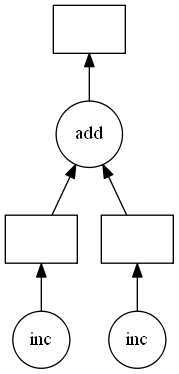

In [7]:
z.visualize()

In [8]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

Wall time: 8.04 s


In [10]:
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-8303337a-e0c1-490d-a437-57b89bff551e')
After computing : 44


In [11]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
Wall time: 10.1 s


In [13]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

In [14]:
%time total.compute()

Wall time: 2.02 s


90

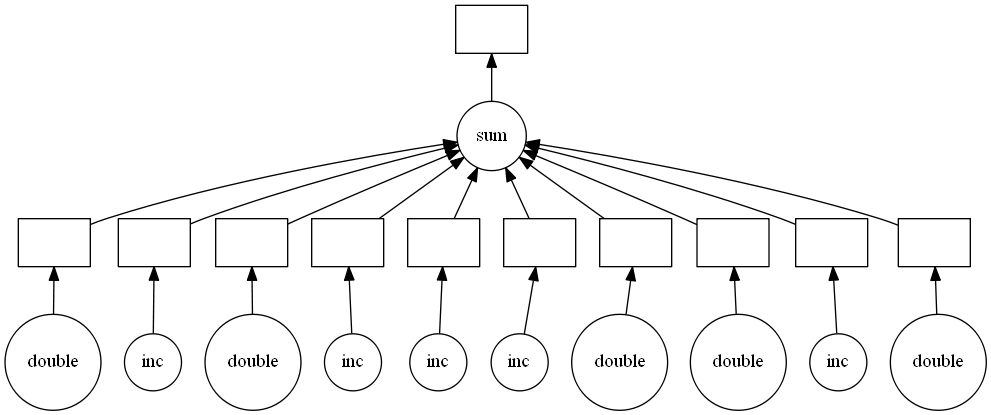

In [15]:
total.visualize()

In [16]:
%%time
       1

Wall time: 0 ns


1